<img src="image-20250213-220809.png" width="" align="" />

COLEGIO DE CIENCIAS E INGENIERIA


INGENIERIA INDUSTRIAL


IIN 3007E-Business Analytics 

NRC: 1458

Project Submission

SEMESTER: Second Semester 2024-2025 (202420)

Daniel Jiménez 00330332

Diego Andrade 00330720

Piero D'aniello 00330812

María Baldeón Calisto

10-04-2025

In [1]:
#impor libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Read csv file
patients=pd.read_csv('/work/SEER Breast Cancer Dataset .csv')
#Print data
display(patients.head(10))

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,10,White,Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,16,1,69,Alive
1,30,White,Single (never married),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,28,Positive,Positive,19,7,74,Alive
2,30,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N1,IIB,Moderately differentiated; Grade II,Regional,25,Positive,Positive,15,3,78,Alive
3,31,White,Divorced,NaN,T2,N1,IIB,Moderately differentiated; Grade II,Regional,42,Positive,Positive,9,3,5,Alive
4,31,Black,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,30,Positive,Positive,16,1,52,Alive
5,31,White,Single (never married),NaN,T3,N2,IIIA,Poorly differentiated; Grade III,Regional,65,Positive,Positive,14,4,60,Alive
6,31,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T3,N1,IIIA,Moderately differentiated; Grade II,Regional,80,Positive,Positive,11,1,61,Alive
7,31,White,Married (including common law),NaN,T1,N1,IIA,Poorly differentiated; Grade III,Regional,10,Positive,Positive,13,1,61,Alive
8,31,White,Divorced,NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,45,Positive,Positive,13,2,63,Alive
9,31,White,Single (never married),NaN,T2,N3,IIIC,Poorly differentiated; Grade III,Regional,30,Positive,Positive,12,10,74,Alive


# EDA

## General Description

In [3]:
# Shape of the data
print("Shape of the data")
print(patients.shape)

# Data types of each variable
print("\nData types of each variable")
display(patients.dtypes)

Shape of the data
(4024, 16)

Data types of each variable


Age                         int64
Race                       object
Marital Status             object
Unnamed: 3                float64
T Stage                    object
N Stage                    object
6th Stage                  object
Grade                      object
A Stage                    object
Tumor Size                  int64
Estrogen Status            object
Progesterone Status        object
Regional Node Examined      int64
Regional Node Positive      int64
Survival Months             int64
Status                     object
dtype: object

In [4]:
# Display the statistical summary of only quantitative variables
patients.describe()

,Age,Unnamed: 3,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months
count,4024.000000,0.0,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.975398,NaN,32.834742,14.357107,4.529324,71.297962
std,9.010704,NaN,109.217549,8.099675,18.264337,22.921430
min,10.000000,NaN,0.000000,1.000000,1.000000,1.000000
25%,47.000000,NaN,16.000000,9.000000,1.000000,56.000000
50%,54.000000,NaN,25.000000,14.000000,2.000000,73.000000
75%,61.000000,NaN,38.000000,19.000000,5.000000,90.000000
max,102.000000,NaN,5400.000000,61.000000,1000.000000,107.000000


In [5]:
#Display the statistical summary of only categorical variables
patients.describe(include=[object])


,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Estrogen Status,Progesterone Status,Status
count,4011,4024,4024,4024,4024,4024,4024,4024,4024,4024
unique,3,6,4,3,5,9,2,2,3,3
top,White,Married (including common law),T2,N1,IIA,Moderately differentiated; Grade II,Regional,Positive,Positive,Alive
freq,3402,2643,1786,2732,1305,2349,3932,3755,3321,3406


In [6]:
#Print unique values object columns
for column in patients.select_dtypes(include=['object']):
    print(f"Unique values in '{column}':")
    print(patients[column].unique())
    print("-" * 40)

Unique values in 'Race ':
['White' 'Other (American Indian/AK Native, Asian/Pacific Islander)'
 'Black' nan]
----------------------------------------
Unique values in 'Marital Status':
['Married (including common law)' 'Single (never married)' 'Divorced'
 'Widowed' 'Separated' 'Split up']
----------------------------------------
Unique values in 'T Stage ':
['T1' 'T2' 'T3' 'T4']
----------------------------------------
Unique values in 'N Stage':
['N1' 'N2' 'N3']
----------------------------------------
Unique values in '6th Stage':
['IIA' 'IIIA' 'IIB' 'IIIC' 'IIIB']
----------------------------------------
Unique values in 'Grade':
['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV'
 'jluky' 'cfjfdit' 'ijkhliuy' 'cfhgdk' 'jjjjj']
----------------------------------------
Unique values in 'A Stage':
['Regional' 'Distant']
----------------------------------------
Unique values in 'Estrogen Stat

In [7]:
# Values to find in Grade column
grades_to_find = ['jluky', 'cfjfdit', 'ijkhliuy', 'cfhgdk', 'jjjjj']

# Replace specified grades with NaN
patients.loc[patients['Grade'].isin(grades_to_find), 'Grade'] = np.nan

# Replace "neutral" Status values with NaN
patients.loc[patients['Progesterone Status'] == 'Neutral', 'Progesterone Status'] = np.nan


In [8]:
# Identify columns with missing values and calculate their percentage
missing_values = patients.isnull().sum()
missing_percentage = (missing_values / len(patients)) * 100

print("\n--- Missing Values per Column ---")
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Percentage', ascending=False)
display(missing_summary)



--- Missing Values per Column ---


,Missing Values,Percentage
Unnamed: 3,4024,100.000000
Race,13,0.323062
Grade,5,0.124254
Progesterone Status,5,0.124254
Age,0,0.000000
Marital Status,0,0.000000
T Stage,0,0.000000
N Stage,0,0.000000
6th Stage,0,0.000000
A Stage,0,0.000000


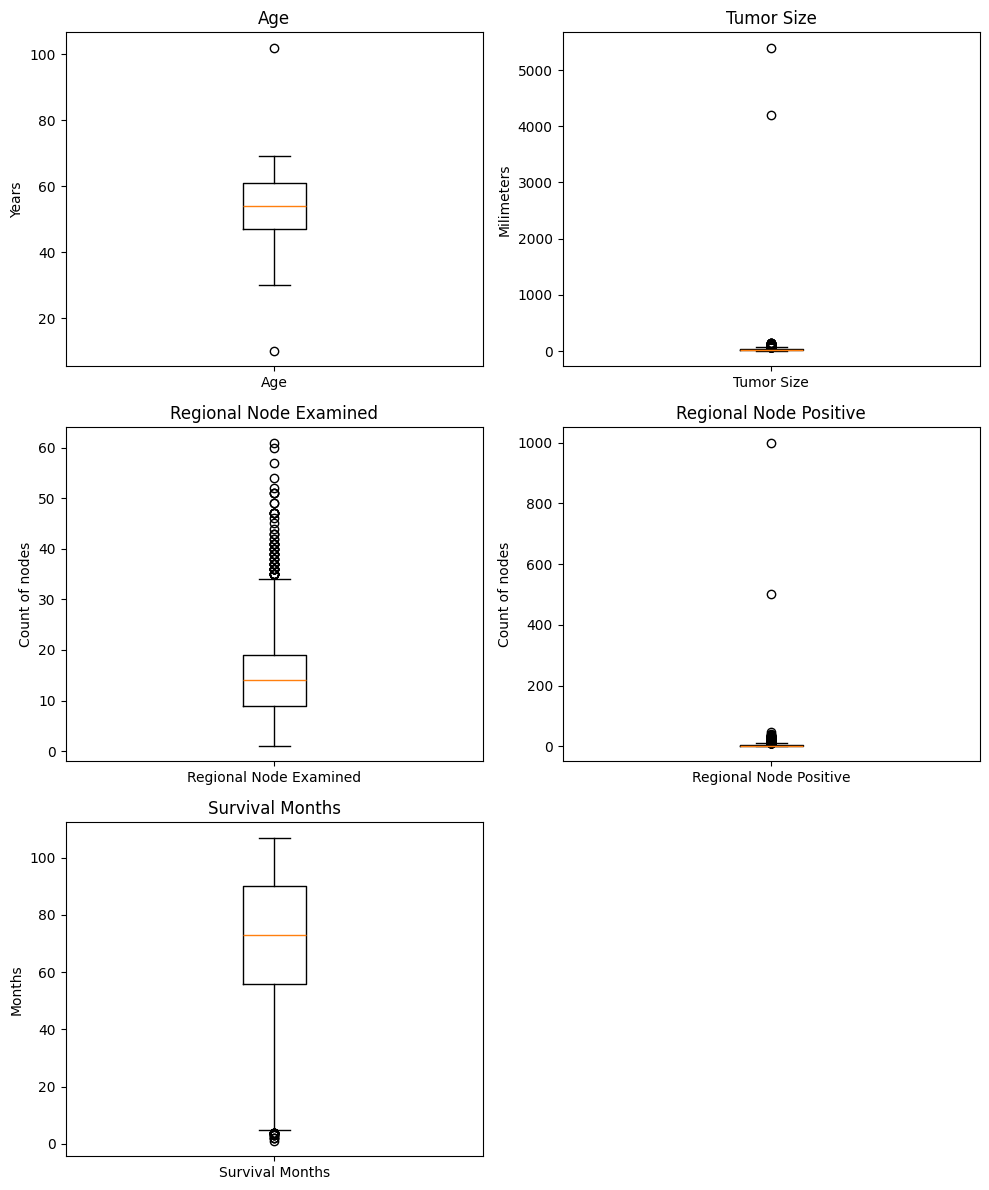

In [9]:
# Select numerical (int) columns
numerical_data = patients.select_dtypes(include=['int'])

# Define your custom y-axis labels 
custom_y_labels = [
    'Years',
    'Milimeters',
    'Count of nodes',
    'Count of nodes',
    'Months',
]

# Determine layout
cols = 2
rows = (len(numerical_data.columns) + 1) // cols  # Ensures enough rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
axes = axes.flatten()  # Flatten in case it's a 2D array

# Create each boxplot manually
for i, column in enumerate(numerical_data.columns):
    axes[i].boxplot(numerical_data[column])
    axes[i].set_title(column)
    axes[i].set_ylabel(custom_y_labels[i])  # Set custom y-axis label
    axes[i].set_xticklabels([column])       # Set x-axis label to the variable name

# Hide any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



## Handling outliers, null values

### Null values

In [10]:
# Create a copy of the original DataFrame
patients_clean = patients.copy()

# Delete columns Unnamed: 3
patients_clean = patients_clean.drop('Unnamed: 3', axis=1)

# Delete rows with null values
patients_clean = patients_clean.dropna()

In [11]:
# Check length of dataframe after cleaning
print("Length of dataframe after cleaning:", len(patients_clean))

Length of dataframe after cleaning: 4001


In [12]:
#Check missing values
missing_values = patients_clean.isnull().sum()
missing_percentage = (missing_values / len(patients_clean)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Percentage', ascending=False)
display(missing_summary)

,Missing Values,Percentage
Age,0,0.0
Race,0,0.0
Marital Status,0,0.0
T Stage,0,0.0
N Stage,0,0.0
6th Stage,0,0.0
Grade,0,0.0
A Stage,0,0.0
Tumor Size,0,0.0
Estrogen Status,0,0.0


### Outlier values

Detection

In [13]:
# Select numerical (int) columns
numerical_data = patients_clean.select_dtypes(include=['int'])

# Loop through each numerical column to find outliers

for column in numerical_data:
    # Calculate Q1, Q3 and IQR
    Q1 = patients_clean[column].quantile(0.25)
    Q3 = patients_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = patients_clean[(patients[column] < lower_bound) | (patients_clean[column] > upper_bound)]
    
    # Sort outliers in descending order
    outliers = outliers.sort_values(by=column, ascending=False)

    # Print results
    print(f"Outliers in '{column}':")
    display(outliers[[column]])
    print(outliers[[column]].shape)
    print("-" * 40)



Outliers in 'Age':
/tmp/ipykernel_217/2583539398.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = patients_clean[(patients[column] < lower_bound) | (patients_clean[column] > upper_bound)]


,Age
4023,102
0,10


(2, 1)
----------------------------------------
Outliers in 'Tumor Size':
/tmp/ipykernel_217/2583539398.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = patients_clean[(patients[column] < lower_bound) | (patients_clean[column] > upper_bound)]


,Tumor Size
1984,5400
1961,4200
1041,140
2826,140
793,140
...,...
3438,72
3688,72
2915,72
1115,72


(224, 1)
----------------------------------------
Outliers in 'Regional Node Examined':
/tmp/ipykernel_217/2583539398.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = patients_clean[(patients[column] < lower_bound) | (patients_clean[column] > upper_bound)]


,Regional Node Examined
3178,61
812,60
3628,57
3564,54
1166,52
...,...
1387,35
915,35
356,35
3919,35


(72, 1)
----------------------------------------
Outliers in 'Regional Node Positive':
/tmp/ipykernel_217/2583539398.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = patients_clean[(patients[column] < lower_bound) | (patients_clean[column] > upper_bound)]


,Regional Node Positive
233,1000
1083,500
3564,46
2314,41
2814,37
...,...
2499,12
1190,12
3701,12
1146,12


(344, 1)
----------------------------------------
Outliers in 'Survival Months':
/tmp/ipykernel_217/2583539398.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = patients_clean[(patients[column] < lower_bound) | (patients_clean[column] > upper_bound)]


,Survival Months
3795,4
3731,4
3947,4
3874,4
3848,4
3818,4
3758,4
3990,4
3568,4
1515,4


(18, 1)
----------------------------------------


In [14]:
# Filter patients where regional node positive is greater than examined
suspicious_patients = patients[patients['Regional Node Positive'] > patients['Regional Node Examined']]

# Display the result
display(suspicious_patients)

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
233,40,White,Married (including common law),NaN,T3,N1,IIIA,Moderately differentiated; Grade II,Regional,60,Negative,Negative,17,1000,89,Alive
1083,49,White,Married (including common law),NaN,T3,N2,IIIA,Moderately differentiated; Grade II,Regional,52,Positive,Negative,32,500,68,Alive


Handling outliers

Eliminate errors

In [15]:
# Elimate rows with tumor size greater than 999
patients_clean = patients_clean[patients_clean['Tumor Size'] < 150]
#Elimate rows with Regional Node Positive greater than 99
patients_clean = patients_clean[patients_clean['Regional Node Positive'] <= 99]

Winsorization

In [16]:
# Columns to winsorize
cols_to_winsorize = ['Regional Node Examined', 'Regional Node Positive']

# Define limits for lower and upper tails (e.g., 5% each)
limits = (0.0, 0.01)

# Apply winsorization
for col in cols_to_winsorize:
    patients_clean[col] = winsorize(patients_clean[col], limits=limits)


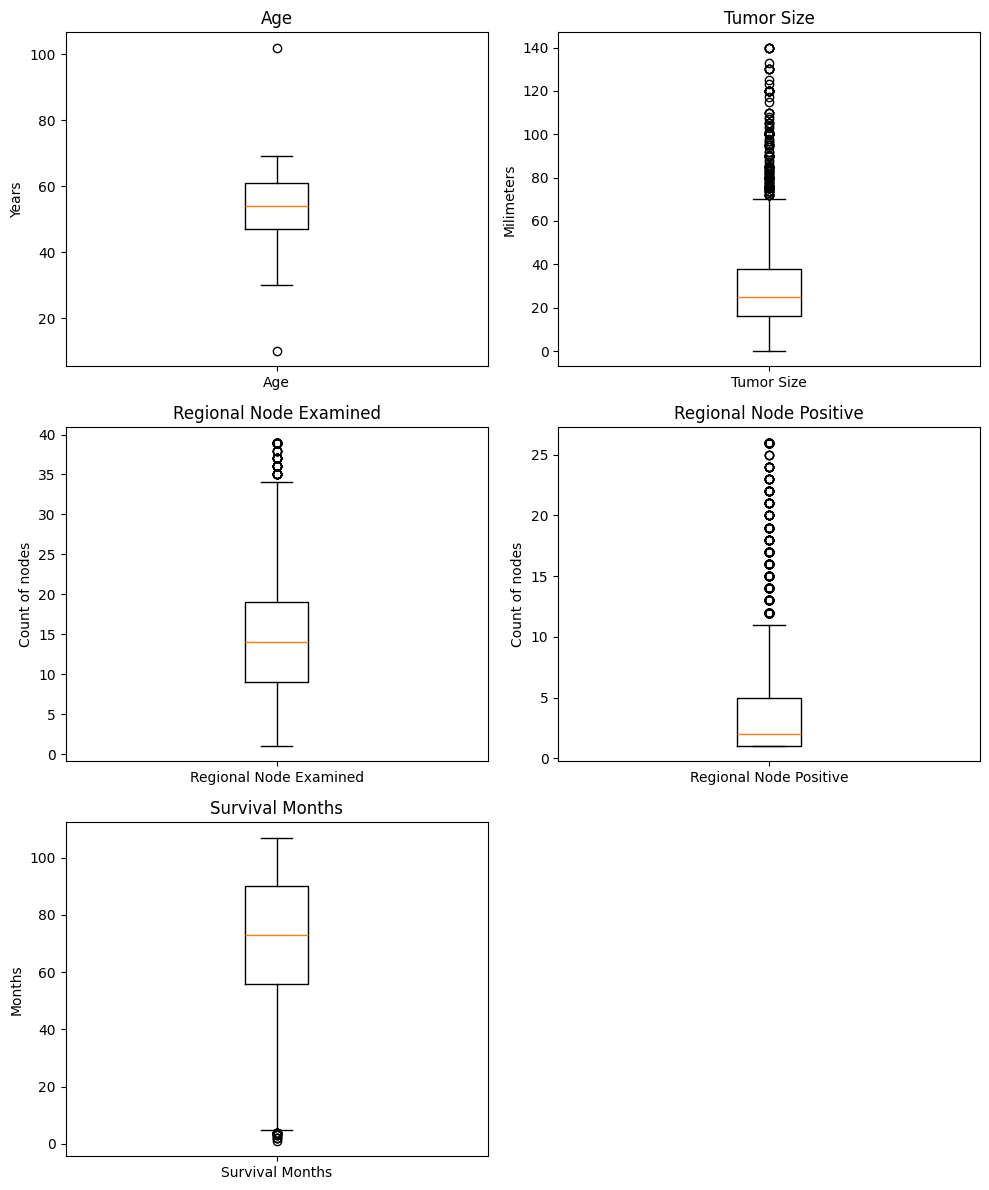

In [17]:
# Select numerical (int) columns
numerical_data = patients_clean.select_dtypes(include=['int'])

# Define your custom y-axis labels (same length/order as your numerical columns)
custom_y_labels = [
    'Years',
    'Milimeters',
    'Count of nodes',
    'Count of nodes',
    'Months',
]

# Determine layout
cols = 2
rows = (len(numerical_data.columns) + 1) // cols  # Ensures enough rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
axes = axes.flatten()  # Flatten in case it's a 2D array

# Create each boxplot manually
for i, column in enumerate(numerical_data.columns):
    axes[i].boxplot(numerical_data[column])
    axes[i].set_title(column)
    axes[i].set_ylabel(custom_y_labels[i])  # Set custom y-axis label
    axes[i].set_xticklabels([column])       # Set x-axis label with the variable name

# Hide any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [18]:
#Check if there are still outliers
filtered_rows = patients_clean[patients_clean['Regional Node Positive'] > patients_clean['Regional Node Examined']]
print(filtered_rows)

Empty DataFrame
Columns: [Age, Race , Marital Status, T Stage , N Stage, 6th Stage, Grade, A Stage, Tumor Size, Estrogen Status, Progesterone Status, Regional Node Examined, Regional Node Positive, Survival Months, Status]
Index: []


In [19]:
# Loop through each numerical column to find outliers
for column in numerical_data:
    # Calculate Q1, Q3 and IQR
    Q1 = patients_clean[column].quantile(0.25)
    Q3 = patients_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = patients_clean[(patients_clean[column] < lower_bound) | (patients_clean[column] > upper_bound)]

    # Calculate percentage of outliers
    total_rows = len(patients_clean)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / total_rows) * 100

    # Sort outliers in descending order
    outliers = outliers.sort_values(by=column, ascending=False)

    # Print results
    print(f"Outliers in '{column}':")
    display(outliers[[column]])
    print(f"Count: {outlier_count} ({outlier_percentage:.2f}% of total)")
    print("-" * 40)

Outliers in 'Age':


,Age
4023,102
0,10


Count: 2 (0.05% of total)
----------------------------------------
Outliers in 'Tumor Size':


,Tumor Size
2826,140
2398,140
3467,140
1041,140
793,140
...,...
3484,72
2915,72
3438,72
3688,72


Count: 222 (5.55% of total)
----------------------------------------
Outliers in 'Regional Node Examined':
/root/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/root/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,Regional Node Examined
4005,39
1464,39
1562,39
1810,39
1874,39
...,...
1387,35
915,35
356,35
3919,35


Count: 72 (1.80% of total)
----------------------------------------
Outliers in 'Regional Node Positive':
/root/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/root/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,Regional Node Positive
2528,26
1889,26
3800,26
3647,26
3655,26
...,...
2499,12
1190,12
3701,12
1146,12


Count: 342 (8.56% of total)
----------------------------------------
Outliers in 'Survival Months':


,Survival Months
3795,4
3731,4
3947,4
3874,4
3848,4
3818,4
3758,4
3990,4
3568,4
1515,4


Count: 18 (0.45% of total)
----------------------------------------


### Variables distribution

 Variable Distributions:



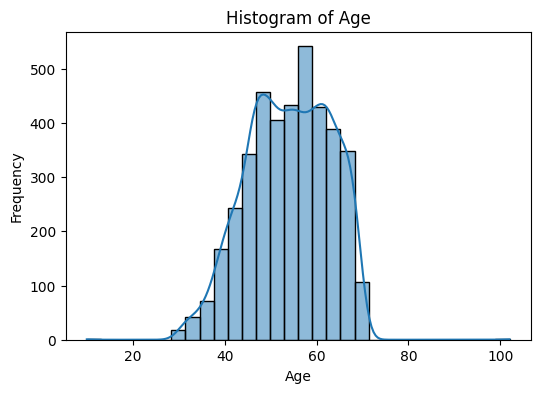

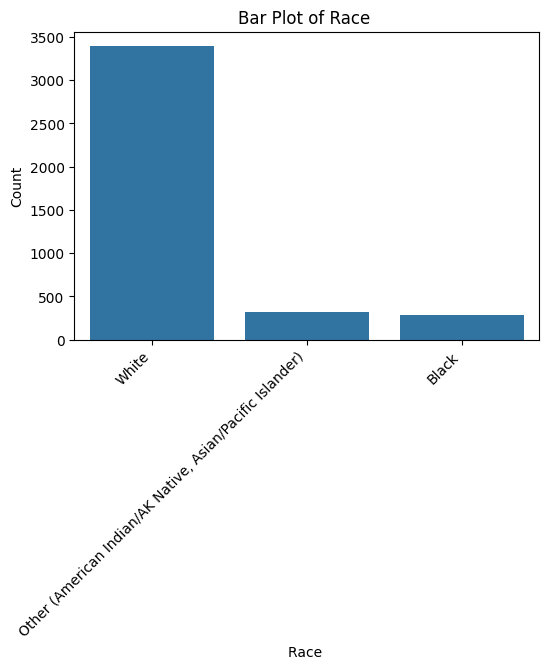

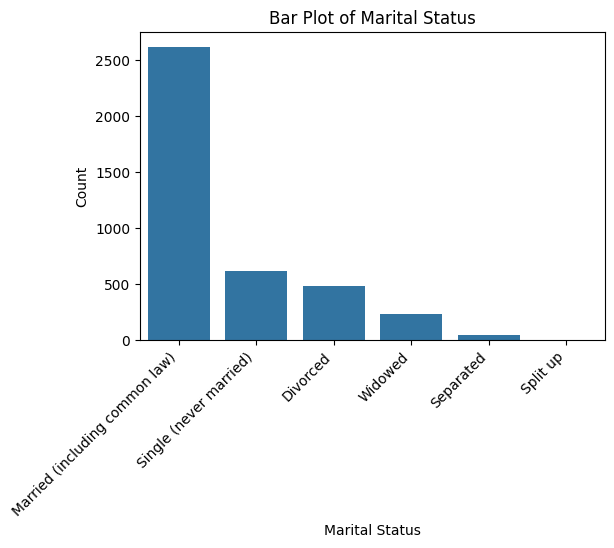

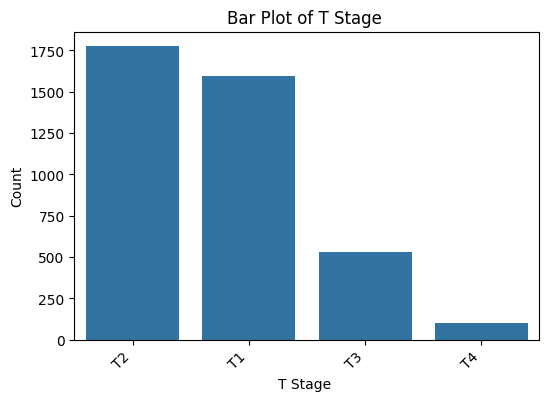

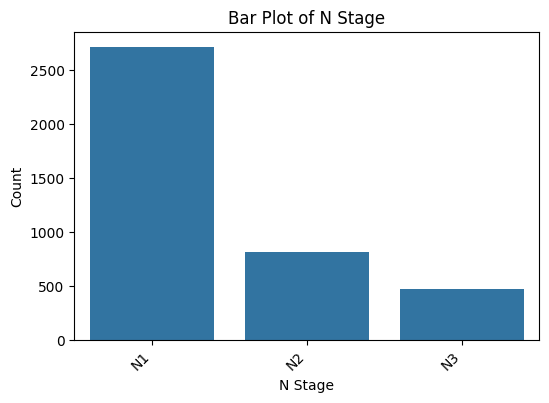

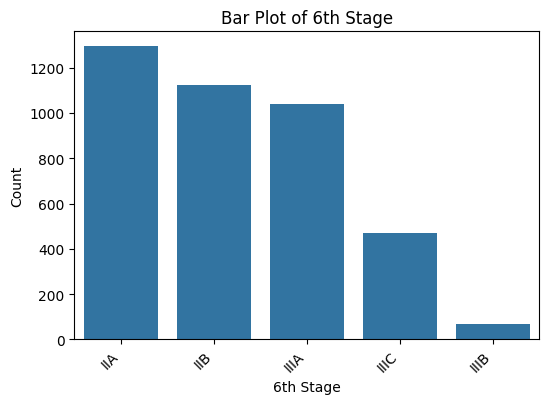

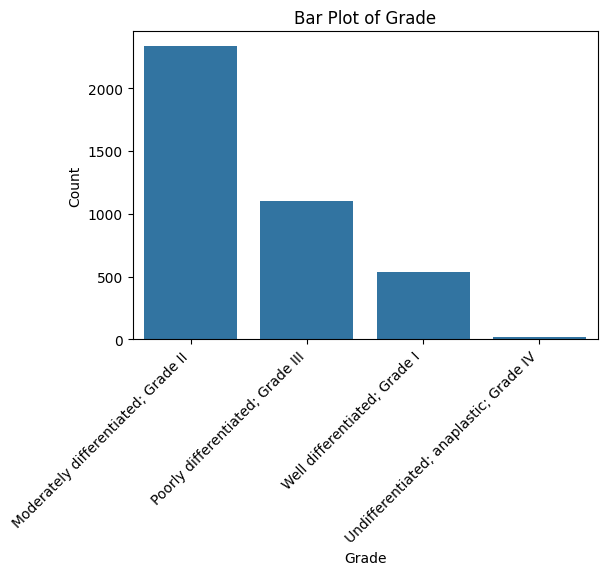

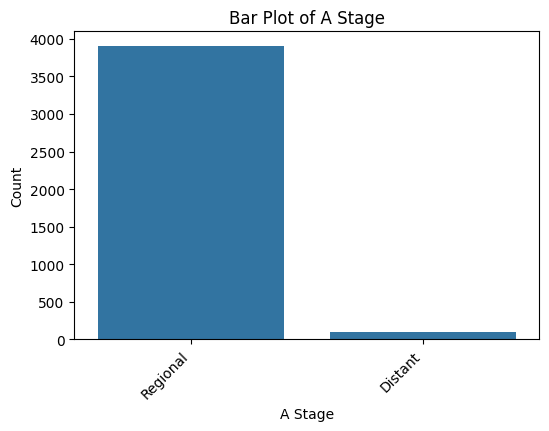

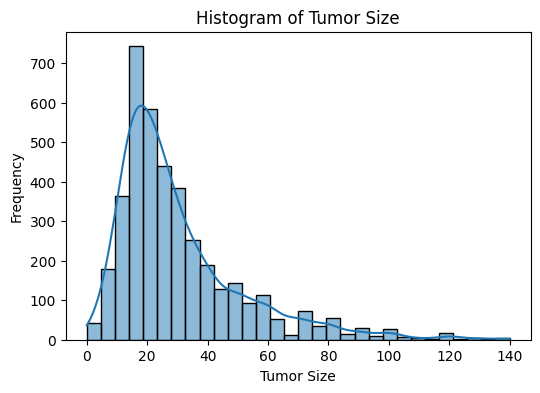

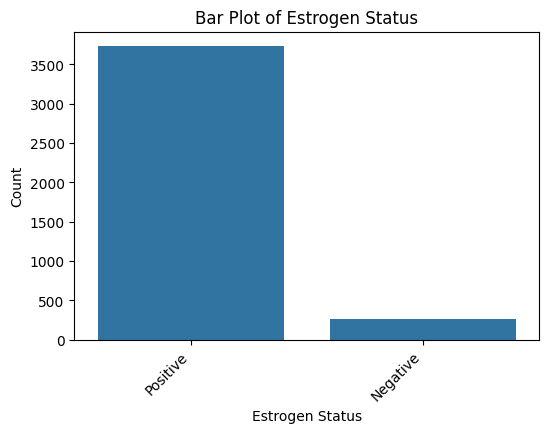

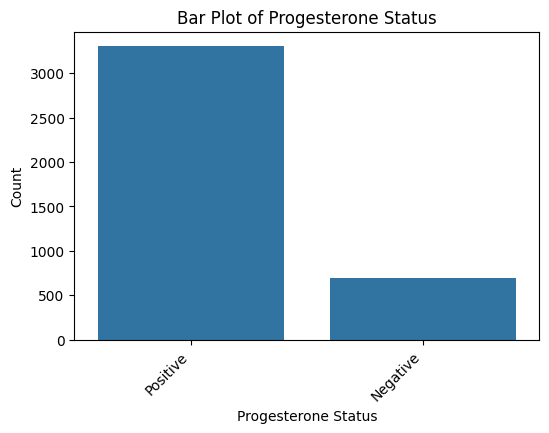

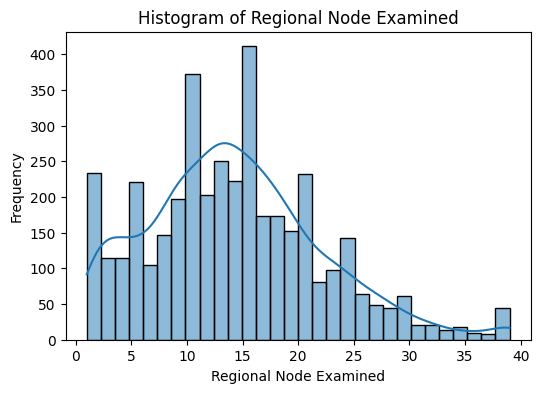

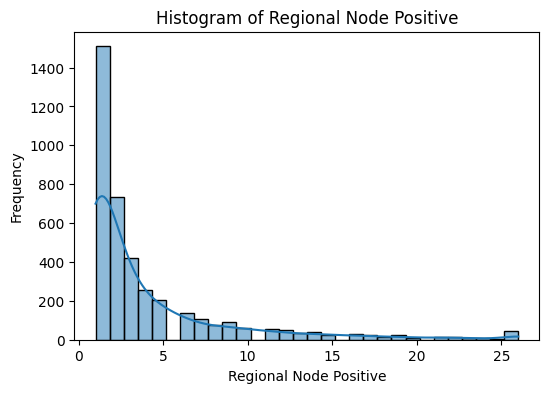

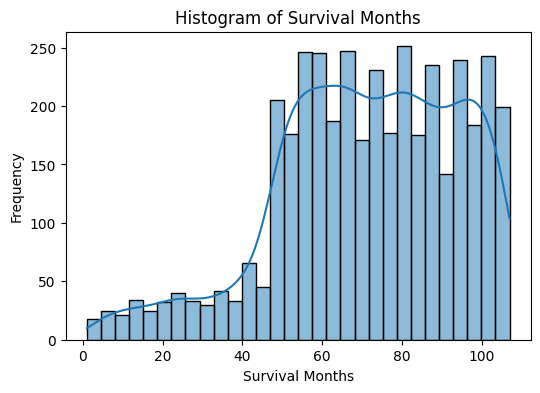

Distribution of the Response Variable (Status):


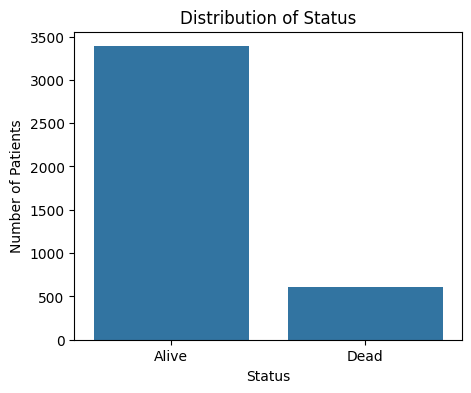

In [20]:
# Replace 'Not dead' with Alive
patients_clean['Status'] = patients_clean['Status'].replace('Not dead', 'Alive')

#Replace 'Splited up' with Separated
patients_clean['Marital Status'] = patients_clean['Marital Status'].replace('Splited up', 'Separated')

# Define the response variable and the predictors variables 
response_var = 'Status'  # The response variable column
predictor_vars = patients_clean.columns.drop(response_var) #All the variables in the columns except 
                                                            #from the response variable

print(" Variable Distributions:\n")
#Create a loop that goes through all the predictor variables
for col in predictor_vars:
    plt.figure(figsize=(6, 4)) #Estandarize the size of the plot
    
    # If it's categorical (nominal or ordinal) 
    if patients_clean[col].dtype == 'object': 
        #Do a barplot (for better visualization)
        sns.countplot(x=patients_clean[col], order=patients_clean[col].value_counts().index)
        plt.title(f"Bar Plot of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')
    #If its a numeric variable
    else:
        #Do a histogram (for better visualization)
        sns.histplot(patients_clean[col], kde=True, bins=30)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
    
    #Display the plot
    plt.show()

# Visualize the response variable
print("Distribution of the Response Variable (Status):")
#Since it is a categorical value, make a bar plot
plt.figure(figsize=(5, 4))
sns.countplot(x=patients_clean[response_var], order=patients_clean[response_var].value_counts().index)
plt.title("Distribution of Status")
plt.xlabel("Status")
plt.ylabel("Number of Patients")
plt.show()

In [21]:
# minimum and maximum values of survival months
print("Minimum survival months:", patients['Survival Months'].min())
print("Maximum survival months:", patients['Survival Months'].max())

Minimum survival months: 1
Maximum survival months: 107


### Correlation

In [22]:
#Make sure the response variable is in binary format
patients_clean['Status'] = patients_clean['Status'].map({'Alive': 1, 'Dead': 0})

In [23]:
print(patients_clean.columns.tolist())

['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months', 'Status']


In [24]:
patients_clean.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,10,White,Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,16,1,69,1
1,30,White,Single (never married),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,28,Positive,Positive,19,7,74,1
2,30,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N1,IIB,Moderately differentiated; Grade II,Regional,25,Positive,Positive,15,3,78,1
3,31,White,Divorced,T2,N1,IIB,Moderately differentiated; Grade II,Regional,42,Positive,Positive,9,3,5,1
4,31,Black,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,30,Positive,Positive,16,1,52,1


In [25]:
# Encode ordinal variable
t_stage_map = {'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4}
n_stage_map = {'N1': 1, 'N2': 2, 'N3': 3}
stage6_map = {'IIA': 1, 'IIB': 2, 'IIIA': 3, 'IIIB': 4, 'IIIC': 5}
grade_map = {'Well differentiated; Grade I': 1, 'Moderately differentiated; Grade II': 2, 'Poorly differentiated; Grade III': 3, 
'Undifferentiated; anaplastic; Grade IV': 4}

patients_clean['T Stage '] = patients_clean['T Stage '].map(t_stage_map)
patients_clean['N Stage'] = patients_clean['N Stage'].map(n_stage_map)
patients_clean['6th Stage'] = patients_clean['6th Stage'].map(stage6_map)
patients_clean['Grade'] = patients_clean['Grade'].map(grade_map)

# Create dummy variables for categorical nominal variables

patients_clean = pd.get_dummies(patients_clean, columns=[
    'Race ',
    'Marital Status',
    'A Stage',
    'Estrogen Status',
    'Progesterone Status'
], drop_first=True)

In [26]:
# Convert all columns to integers
patients_clean = patients_clean.astype(int)

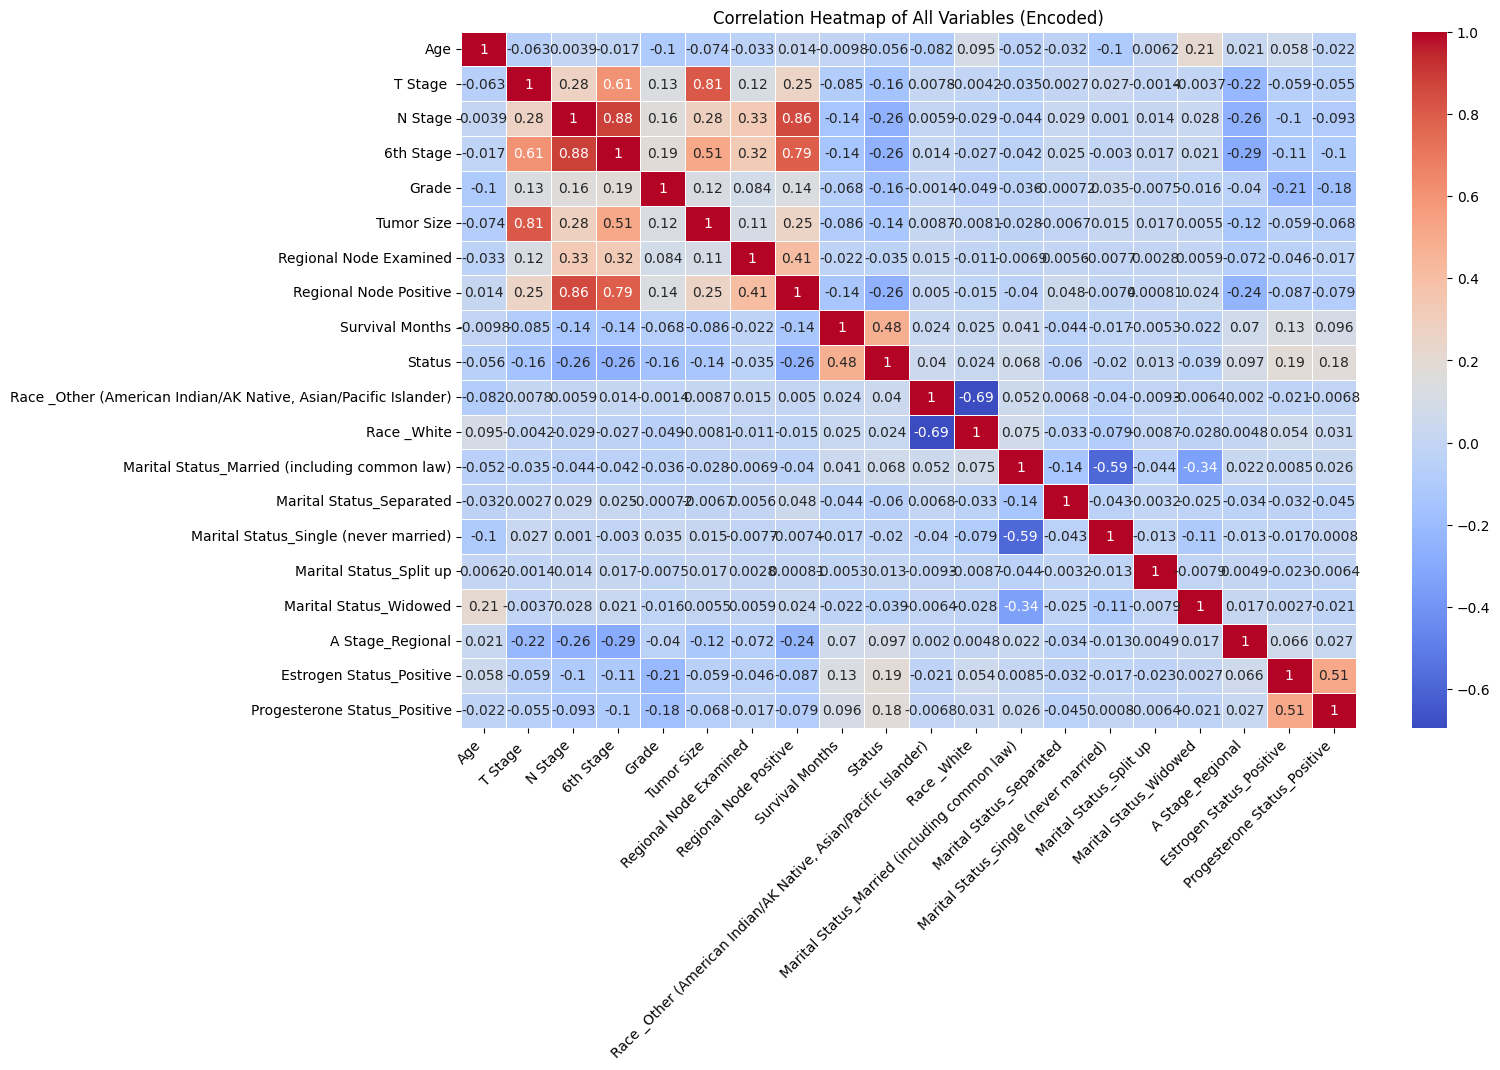

In [27]:
# Step 2: Compute correlation matrix
corr_matrix = patients_clean.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=0.5)
plt.title("Correlation Heatmap of All Variables (Encoded)")
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

## Normalization of numerical variables

In [28]:
#Import libraries needed
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Define which are the numerical columns of the dataset
numerical_columns = ['Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months',
                    'T Stage ', 'N Stage', '6th Stage', 'Grade']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler to the selected numerical columns (learn min and max values)
scaler.fit(patients_clean[numerical_columns])

# Apply the normalization and set the same index as patients_clean
X_stand = pd.DataFrame(
    scaler.transform(patients_clean[numerical_columns]),
    columns=numerical_columns,
    index=patients_clean.index  # match the rows to avoid NAN
)

# Replace the original columns with the scaled values
patients_clean[numerical_columns] = X_stand


In [30]:
patients_clean.head()

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months,Status,"Race _Other (American Indian/AK Native, Asian/Pacific Islander)",Race _White,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Split up,Marital Status_Widowed,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive
0,0.000000,0.000000,0.0,0.00,0.333333,0.064286,0.394737,0.00,0.641509,1,0,1,1,0,0,0,0,1,1,1
1,0.217391,0.333333,0.5,0.50,0.333333,0.200000,0.473684,0.24,0.688679,1,0,1,0,0,1,0,0,1,1,1
2,0.217391,0.333333,0.0,0.25,0.333333,0.178571,0.368421,0.08,0.726415,1,1,0,1,0,0,0,0,1,1,1
3,0.228261,0.333333,0.0,0.25,0.333333,0.300000,0.210526,0.08,0.037736,1,0,1,0,0,0,0,0,1,1,1
4,0.228261,0.333333,0.0,0.25,0.666667,0.214286,0.394737,0.00,0.481132,1,0,0,1,0,0,0,0,1,1,1


# Dataset partition

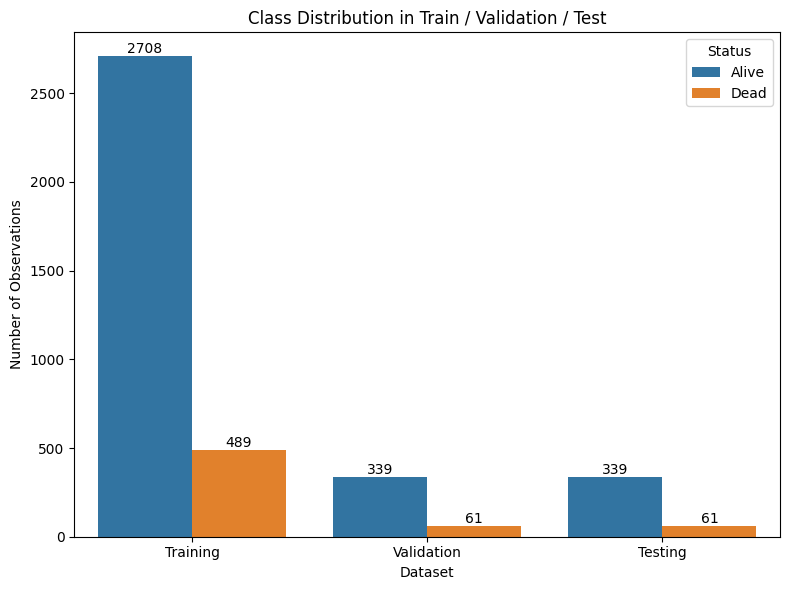

In [31]:
# Separate variables and target
X = patients_clean.drop('Status', axis=1)  # All columns except target column
y = patients_clean['Status']

# First, separate 80% training and 20% (which will later be split into val and test)
train_set, temp_set = train_test_split(patients_clean, test_size=0.2, 
random_state=42,# Ensures reproducibility; every time you run the code, the split will be the same if you use the same random_state
stratify=patients_clean['Status'])# Ensures that the class distribution of the target variable 'Status' is maintained in both splits

# Then, split the remaining 20% into 10% validation and 10% test
val_set, test_set = train_test_split(temp_set, test_size=0.50, random_state=42, stratify=temp_set['Status'])

# Create copies before adding labels
train_copy = train_set.copy()
val_copy = val_set.copy()
test_copy = test_set.copy()

# Add Dataset labels
train_copy['Dataset'] = 'Training'
val_copy['Dataset'] = 'Validation'
test_copy['Dataset'] = 'Testing'

# Combine all into one DataFrame
combined = pd.concat([train_copy, val_copy, test_copy], ignore_index=True)

# Map Status to human-readable labels
combined['Status_Label'] = combined['Status'].map({0: 'Dead', 1: 'Alive'})

# Plot class distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=combined,
    x='Dataset',
    hue='Status_Label',
    order=['Training', 'Validation', 'Testing'],
    hue_order=['Alive', 'Dead']
)
plt.xlabel('Dataset')
plt.ylabel('Number of Observations')
plt.title('Class Distribution in Train / Validation / Test')
plt.legend(title='Status')

# Annotate bar heights
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f"{int(height)}",
            (p.get_x() + p.get_width() / 2, height),
            ha='center', va='bottom'
        )

plt.tight_layout()
plt.show()

In [32]:
# Compute counts per Dataset and Status
counts = combined.groupby(['Dataset', 'Status_Label']).size().unstack(fill_value=0)

# Compute percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Optionally, round for readability
percentages = percentages.round(2)

display(percentages)

Status_Label,Alive,Dead
Dataset,,
Testing,84.75,15.25
Training,84.70,15.30
Validation,84.75,15.25


# Evaluation balance techniques

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import KMeansSMOTE


In [34]:
# Set up 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## SMOTEENN

In [35]:
# List smoteenn f1 scores
f1_scores_smoteenn = []

# Loop through folds
for train_index, test_index in kf.split(X, y):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTEENN only to the training set
    smoteen = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smoteen.fit_resample(X_train, y_train)
    
    # Fit Logistic Regression on the resampled training data
    model = LogisticRegression(solver='liblinear', random_state=42)
    model.fit(X_resampled, y_resampled)
    
    # Predict on the original (untouched) test set
    y_pred = model.predict(X_test)
    
    # Calculate F1 score and store it
    score = f1_score(y_test, y_pred, average='macro')
    f1_scores_smoteenn.append(score)

# Print final results
print("F1 scores per fold (SMOTEENN):", f1_scores_smoteenn)
print("Average F1 score:", np.mean(f1_scores_smoteenn))

F1 scores per fold (SMOTEENN): [0.6599999999999999, 0.6599713404415515, 0.6320912413721397, 0.6962899050905953, 0.6545437098167163, 0.6644490402744209, 0.6367872807017544, 0.7128348660535786, 0.6591901297057893, 0.6884676722705827]
Average F1 score: 0.6664625185727128


## K-Means Smote

In [36]:
#List SMOTEENN
f1_scores_kmeans = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply KMeansSMOTE to training data only
    ksmote = KMeansSMOTE(k_neighbors=5, #neighbors to create synthetic samples
    cluster_balance_threshold = 0.35 #at least 50% of minority classes should be in the minority cluster
    ,random_state=42)
    X_resampled, y_resampled = ksmote.fit_resample(X_train, y_train)
    
    # Train Logistic Regression
    model = LogisticRegression(solver='liblinear', random_state=42)
    model.fit(X_resampled, y_resampled)
    
     # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate F1 score
    score = f1_score(y_test, y_pred, average='macro')
    f1_scores_kmeans.append(score)

# Print results
print("F1 scores per fold:", f1_scores_kmeans)
print("Average F1 score:", np.mean(f1_scores_kmeans))

/root/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/root/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/root/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/root/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitl

## Wilcoxon test

In [37]:
from scipy.stats import wilcoxon

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(f1_scores_smoteenn, f1_scores_kmeans, alternative='two-sided')

# Print the results
print("Wilcoxon signed-rank test")
print(f"Test statistic: {statistic}")
print(f"P-value: {p_value}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Result: Statistically significant difference (reject H₀)")
else:
    print("Result: No statistically significant difference (fail to reject H₀)")


Wilcoxon signed-rank test
Test statistic: 0.0
P-value: 0.001953125
Result: Statistically significant difference (reject H₀)


# Machine learning algorithms

## Apply K-Means Smote

In [38]:
# Separate features and target
X_train = train_set.drop(columns='Status')
y_train = train_set['Status']

# Apply Kmeans Smote
KMSmote = KMeansSMOTE(k_neighbors=5, #neighbors to create synthetic samples
cluster_balance_threshold = 0.5, #at least 50% of minority classes should be in the minority cluster
kmeans_estimator = 10, #number of clusters
random_state=40)
X_train_resampled_KS, y_train_resampled_KS = KMSmote.fit_resample(X_train, y_train)

#Print to verify resampling effect
print("Original training set shape:", X_train.shape, y_train.value_counts().to_dict())
print("Resampled training set shape:", X_train_resampled_KS.shape, y_train_resampled_KS.value_counts().to_dict())#

/root/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
Original training set shape: (3197, 19) {1: 2708, 0: 489}
Resampled training set shape: (5416, 19) {1: 2708, 0: 2708}


## AdaBoost

In [39]:
#validation head percentage of minority clas

val_set['Status'].value_counts(normalize=True)

Status
1    0.8475
0    0.1525
Name: proportion, dtype: float64

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.utils import resample


# Separate features and labels from validation set
X_val = val_set.drop(columns='Status')
y_val = val_set['Status']

# Define hyperparameter grid
n_estimators = [2**i for i in range(9)]  # 1 to 256
param_grid = {
    'n_estimators': n_estimators,
    'learning_rate': [0.001, 0.01, 0.1]
}

best_score = 0
best_params = {}
top_params_list = []  # Store all top-scoring configs

# Grid search with bootstrap evaluation
for n in param_grid['n_estimators']:
    for lr in param_grid['learning_rate']:
        model = AdaBoostClassifier(n_estimators=n, learning_rate=lr, random_state=42)
        model.fit(X_train_resampled_KS, y_train_resampled_KS)
        
        bootstrap_scores = []
        for i in range(50):
            X_val_boot, y_val_boot = resample(X_val, y_val, replace=True, random_state=42 + i)
            y_pred_boot = model.predict(X_val_boot)
            f1 = f1_score(y_val_boot, y_pred_boot, average='macro')
            bootstrap_scores.append(f1)
        
        mean_f1 = np.mean(bootstrap_scores)
        print(f'n_estimators={n}, learning_rate={lr}, Mean F1 score (bootstrap x50) = {mean_f1:.7f}')
        
        # If strictly better score, reset list
        if mean_f1 > best_score:
            best_score = mean_f1
            best_params = {'n_estimators': n, 'learning_rate': lr}
            top_params_list = [best_params.copy()]
        
        # If equal score, append
        elif mean_f1 == best_score:
            top_params_list.append({'n_estimators': n, 'learning_rate': lr})

# Print best results
print("\nBest Bootstrap Validation F1:", f"{best_score:.5f}")
print("Top Parameter Combinations with Best Score:")
for params in top_params_list:
    print(params)


n_estimators=1, learning_rate=0.001, Mean F1 score (bootstrap x50) = 0.5819883
n_estimators=1, learning_rate=0.01, Mean F1 score (bootstrap x50) = 0.5819883
n_estimators=1, learning_rate=0.1, Mean F1 score (bootstrap x50) = 0.5819883
n_estimators=2, learning_rate=0.001, Mean F1 score (bootstrap x50) = 0.5819883
n_estimators=2, learning_rate=0.01, Mean F1 score (bootstrap x50) = 0.5819883
n_estimators=2, learning_rate=0.1, Mean F1 score (bootstrap x50) = 0.6721057
n_estimators=4, learning_rate=0.001, Mean F1 score (bootstrap x50) = 0.5819883
n_estimators=4, learning_rate=0.01, Mean F1 score (bootstrap x50) = 0.5819883
n_estimators=4, learning_rate=0.1, Mean F1 score (bootstrap x50) = 0.6721057
n_estimators=8, learning_rate=0.001, Mean F1 score (bootstrap x50) = 0.5819883
n_estimators=8, learning_rate=0.01, Mean F1 score (bootstrap x50) = 0.5819883
n_estimators=8, learning_rate=0.1, Mean F1 score (bootstrap x50) = 0.7354092
n_estimators=16, learning_rate=0.001, Mean F1 score (bootstrap x

In [41]:
from sklearn.metrics import f1_score, classification_report,confusion_matrix

# Prepare test set
X_test = test_set.drop(columns='Status')
y_test = test_set['Status']

# Store test F1 scores for each top configuration
test_results = []

print("\n Evaluating Top Configurations on Test Set:")
for params in top_params_list:
    # Train model with current top configuration
    model = AdaBoostClassifier(
        n_estimators=params['n_estimators'],
        learning_rate=params['learning_rate'],
        random_state=42
    )
    model.fit(X_train_resampled_KS, y_train_resampled_KS)

    # Predict and evaluate on test set
    y_pred_test = model.predict(X_test)
    f1 = f1_score(y_test, y_pred_test, average='macro')
    
    # Store results
    test_results.append({
        'n_estimators': params['n_estimators'],
        'learning_rate': params['learning_rate'],
        'f1_test': f1
    })

    print(f"→ Params: {params}, Test F1 Score: {f1:.5f}")

# Find best test result
best_test_model = max(test_results, key=lambda x: x['f1_test'])
print("\n Best Test Set Configuration:")
print(best_test_model)



 Evaluating Top Configurations on Test Set:
→ Params: {'n_estimators': 128, 'learning_rate': 0.1}, Test F1 Score: 0.75814
→ Params: {'n_estimators': 256, 'learning_rate': 0.1}, Test F1 Score: 0.75814

 Best Test Set Configuration:
{'n_estimators': 128, 'learning_rate': 0.1, 'f1_test': 0.7581411419193228}


In [42]:
from sklearn.tree import export_text

# Extract best hyperparameters from best_test_model
best_n_ada = best_test_model['n_estimators']
best_lr_ada = best_test_model['learning_rate']

# Retrain the model using the best parameters
final_model_ada = AdaBoostClassifier(n_estimators=best_n_ada, learning_rate=best_lr_ada, algorithm='SAMME', random_state=42)
final_model_ada.fit(X_train_resampled_KS, y_train_resampled_KS)

# Iterate through all stumps and their weights
for i, (stump, weight) in enumerate(zip(final_model_ada.estimators_, final_model_ada.estimator_weights_)):
    print(f"\n Decision Stump #{i+1} — Weight: {weight:.5f}")
    print(export_text(stump, feature_names=list(X_train_resampled_KS.columns)))

# Average feature importance over all stumps
feature_importance = np.mean([tree.feature_importances_ for tree in final_model_ada.estimators_], axis=0)

# Display top features
for name, score in sorted(zip(X_train_resampled_KS.columns, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score:.5f}")



 Decision Stump #1 — Weight: 0.18962
|--- Progesterone Status_Positive <= 0.50
|   |--- class: 0
|--- Progesterone Status_Positive >  0.50
|   |--- class: 1


 Decision Stump #2 — Weight: 0.17218
|--- Survival Months <= 0.44
|   |--- class: 0
|--- Survival Months >  0.44
|   |--- class: 1


 Decision Stump #3 — Weight: 0.16815
|--- Progesterone Status_Positive <= 0.50
|   |--- class: 0
|--- Progesterone Status_Positive >  0.50
|   |--- class: 1


 Decision Stump #4 — Weight: 0.15249
|--- Survival Months <= 0.44
|   |--- class: 0
|--- Survival Months >  0.44
|   |--- class: 1


 Decision Stump #5 — Weight: 0.14891
|--- Progesterone Status_Positive <= 0.50
|   |--- class: 0
|--- Progesterone Status_Positive >  0.50
|   |--- class: 1


 Decision Stump #6 — Weight: 0.13486
|--- Survival Months <= 0.44
|   |--- class: 0
|--- Survival Months >  0.44
|   |--- class: 1


 Decision Stump #7 — Weight: 0.13931
|--- N Stage <= 0.00
|   |--- class: 1
|--- N Stage >  0.00
|   |--- class: 0


 Decis

In [43]:
# Predict on test set
y_pred_final = final_model_ada.predict(X_test)

# Print classification report
print("\nClassification Report for Best Model on Test Set:")
print(classification_report(y_test, y_pred_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))



Classification Report for Best Model on Test Set:
              precision    recall  f1-score   support

           0       0.60      0.61      0.60        61
           1       0.93      0.93      0.93       339

    accuracy                           0.88       400
   macro avg       0.76      0.77      0.76       400
weighted avg       0.88      0.88      0.88       400


Confusion Matrix:
 [[ 37  24]
 [ 25 314]]


## Random Forest

In [44]:
# Import libraries needed
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,classification_report, confusion_matrix

#Build the random forest model with the stablished hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=120,
    criterion='entropy',
    max_depth=45,
    random_state=42,
    class_weight='balanced'
)
#As we are already defining the model hyperparameters we dont need a validation

#Fit the model with the training sets 
rf_model.fit(X_train_resampled_KS, y_train_resampled_KS)

#Evaluate the model (test)
y_test_pred = rf_model.predict(X_test)

# Evaluation
print("F1 Score:", f1_score(y_test, y_test_pred, average='macro'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Selection of variables 

#Get feature importances
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#Print the features importance
print("Feature Importances:",importance_df)

F1 Score: 0.8111960728783159

Confusion Matrix:
 [[ 36  25]
 [ 10 329]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.59      0.67        61
           1       0.93      0.97      0.95       339

    accuracy                           0.91       400
   macro avg       0.86      0.78      0.81       400
weighted avg       0.91      0.91      0.91       400

Feature Importances:                                               Feature  Importance
8                                     Survival Months    0.259755
18                       Progesterone Status_Positive    0.174746
2                                             N Stage    0.097836
7                              Regional Node Positive    0.095913
3                                           6th Stage    0.056497
5                                          Tumor Size    0.054674
0                                                 Age    0.050787
4                          

## XGB

In [45]:
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.metrics import f1_score

X_val,   y_val   = val_set.drop('Status', axis=1),   val_set['Status']
X_test,  y_test  = test_set.drop('Status', axis=1),  test_set['Status']

# Fixed hyperparameters with binary objective
params = {
    'learning_rate':    0.6,
    'n_estimators':     1000,
    'max_depth':        5,
    'min_child_weight': 11,
    'gamma':            0.1,
    'subsample':        0.8,
    'colsample_bytree': 0.7,
    'objective':        'binary:logistic', 
    'scale_pos_weight': 1,
    'seed':             1234,
    'n_jobs':           -1
}

# Train on train set
final_model_XGB = XGBClassifier(
    **params,
    use_label_encoder=False,
    eval_metric='logloss'
)
final_model_XGB.fit(X_train_resampled_KS, y_train_resampled_KS)

# Bootstrap on validation (50 resamples) for F1 estimate
f1_scores = []
for b in range(50):
    Xb, yb = resample(X_val, y_val, replace=True, random_state=1234 + b)
    preds = final_model_XGB.predict(Xb)
    f1_scores.append(f1_score(yb, preds, average='macro'))

print(f"Validation F1: {np.mean(f1_scores):.4f}")

# Use the trained model to predict on the test set
y_test_pred = final_model_XGB.predict(X_test)

# Full classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))


/root/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:05:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Validation F1: 0.7210
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.62      0.54      0.58        61
           1       0.92      0.94      0.93       339

    accuracy                           0.88       400
   macro avg       0.77      0.74      0.75       400
weighted avg       0.87      0.88      0.88       400



## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# 1. Base model with fixed penalty
logreg = LogisticRegression(
    penalty='l2',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# 2. Hyperparameter space (C and solver only)
param_dist = {
    'C': [100, 10, 1.0, 0.1, 0.01],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']
}

# 3. Randomized search setup
random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_dist,
    n_iter=50,  # Number of combinations to try
    scoring='f1_macro',
    cv=10,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 4. Fit on training set (resampled with SMOTE)
random_search.fit(X_train_resampled_KS, y_train_resampled_KS)

# 5. Best model
best_logreg = random_search.best_estimator_
print(" Best hyperparameters found:", random_search.best_params_)

# 6. Evaluate on test set
y_test_pred = best_logreg.predict(X_test)

# 7. Print evaluation metrics
print(" F1 Score (macro):", f1_score(y_test, y_test_pred, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
# 8. Store the final model
final_model_log = best_logreg

Fitting 10 folds for each of 25 candidates, totalling 250 fits
/root/venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 25 is smaller than n_iter=50. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
 Best hyperparameters found: {'solver': 'liblinear', 'C': 100}
 F1 Score (macro): 0.7297777777777779
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.56      0.54        61
           1       0.92      0.91      0.92       339

    accuracy                           0.86       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.86      0.86      0.86       400

Confusion Matrix:
 [[ 34  27]
 [ 30 309]]


# Model evaluation

In [47]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, roc_auc_score
)

# Function to compute metrics
def calculate_metrics(model, X, y_true, dataset_name, model_name):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else None

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    sensitivity = recall_score(y_true, y_pred, zero_division=0)  # same as recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    auc = roc_auc_score(y_true, y_prob) if y_prob is not None else None

    return {
        "Model": model_name,
        "Dataset": dataset_name,
        "Accuracy": accuracy,
        "Sensitivity (Recall)": sensitivity,
        "Specificity": specificity,
        "Precision": precision,
        "AUC": auc
    }

# Prepare data splits
X_train = X_train_resampled_KS
y_train = y_train_resampled_KS

X_val = val_set.drop(columns="Status")
y_val = val_set["Status"]

X_test = test_set.drop(columns="Status")
y_test = test_set["Status"]

# Model list
models = [
    (final_model_log, "Logistic Regression"),
    (final_model_XGB, "XGBoost"),
    (rf_model, "Random Forest"),
    (final_model_ada, "AdaBoost")
]

# Dataset list
datasets = [
    ("Train", X_train, y_train),
    ("Validation", X_val, y_val),
    ("Test", X_test, y_test)
]

# Collect all results
results = []
for model, model_name in models:
    for dataset_name, X, y in datasets:
        metrics = calculate_metrics(model, X, y, dataset_name, model_name)
        results.append(metrics)


# Create final table
metrics_df = pd.DataFrame(results)

# Round numeric metrics to 4 decimals
metrics_df = metrics_df.round({
    "Accuracy": 4,
    "Sensitivity (Recall)": 4,
    "Specificity": 4,
    "Precision": 4,
    "AUC": 4
})

display(metrics_df.head(12))

,Model,Dataset,Accuracy,Sensitivity (Recall),Specificity,Precision,AUC
0,Logistic Regression,Train,0.9260,0.9357,0.9162,0.9178,0.9708
1,Logistic Regression,Validation,0.8675,0.9204,0.5738,0.9231,0.8381
2,Logistic Regression,Test,0.8575,0.9115,0.5574,0.9196,0.8457
3,XGBoost,Train,0.9980,1.0000,0.9959,0.9960,0.9999
4,XGBoost,Validation,0.8675,0.9322,0.5082,0.9133,0.7800
5,XGBoost,Test,0.8800,0.9410,0.5410,0.9193,0.8162
6,Random Forest,Train,1.0000,1.0000,1.0000,1.0000,1.0000
7,Random Forest,Validation,0.8875,0.9646,0.4590,0.9083,0.8228
8,Random Forest,Test,0.9125,0.9705,0.5902,0.9294,0.8623
9,AdaBoost,Train,0.9321,0.9402,0.9239,0.9251,0.9719


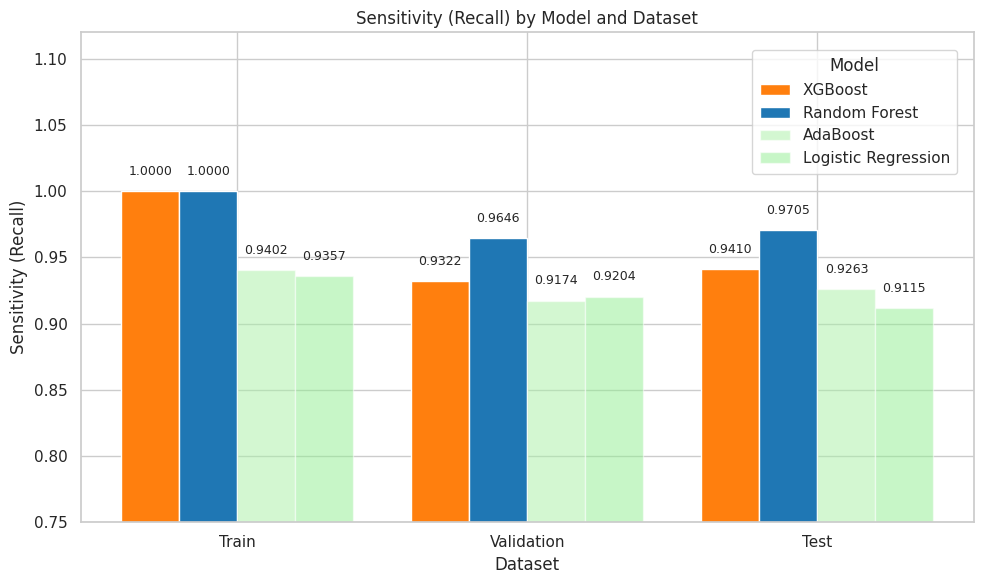

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set dataset order
dataset_order = ["Train", "Validation", "Test"]
metrics_df["Dataset"] = pd.Categorical(metrics_df["Dataset"], categories=dataset_order, ordered=True)

# Sort by Dataset and Sensitivity
ordered_df = metrics_df.sort_values(by=["Dataset", "Sensitivity (Recall)"], ascending=[True, False])

# Set plot style
sns.set(style="whitegrid")

# Unique models and datasets
models_1 = ordered_df["Model"].unique()
datasets = dataset_order

# Set figure
plt.figure(figsize=(10, 6))

# Define width and position offset for bars
bar_width = 0.2
positions = {
    dataset: i for i, dataset in enumerate(datasets)
}

# Custom color map with soft green for Logistic Regression and AdaBoost
color_map = {
    "Logistic Regression": "#90ee90",  # soft green
    "AdaBoost": "#a8f0a5",             # light green
    "Random Forest": sns.color_palette("tab10")[0],
    "XGBoost": sns.color_palette("tab10")[1],
}

# Plot bars manually with transparency control
for i, model in enumerate(models_1):
    for j, dataset in enumerate(datasets):
        row = ordered_df[(ordered_df["Model"] == model) & (ordered_df["Dataset"] == dataset)]
        if not row.empty:
            value = row["Sensitivity (Recall)"].values[0]
            x_pos = positions[dataset] + (i - 1.5) * bar_width
            alpha_val = 0.5 if model in ["Logistic Regression", "AdaBoost"] else 1.0
            plt.bar(x_pos, value, width=bar_width, color=color_map[model], alpha=alpha_val, label=model if j == 0 else "")
            plt.text(x_pos, value + 0.01, f"{value:.4f}", ha='center', va='bottom', fontsize=9)

# X-axis and labels
plt.xticks(ticks=[positions[d] for d in datasets], labels=datasets)
plt.xlabel("Dataset")
plt.ylabel("Sensitivity (Recall)")
plt.title("Sensitivity (Recall) by Model and Dataset")
plt.ylim(0.75, 1.12)

# Adjust legend to be inside the plot (upper left, but shifted down and right)
plt.legend(
    title="Model",
    loc="upper right",              # Anchors legend to the top-right
    bbox_to_anchor=(0.99, 0.98),    # Slightly inside the plot area
    frameon=True,                   # Optional: box around legend
    borderpad=0.5
)


plt.tight_layout()
plt.show()


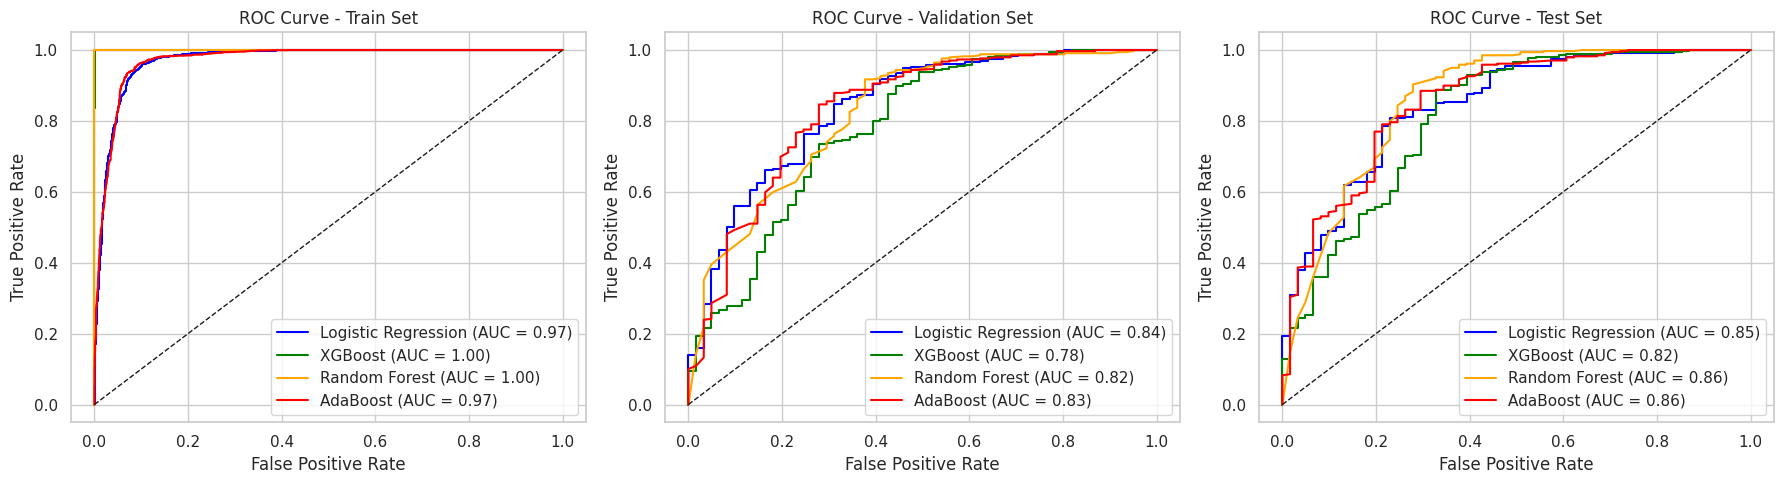

In [50]:
from sklearn.metrics import roc_curve, auc

# Define models with their names and colors
models_graph = [
    (final_model_log, "Logistic Regression", "blue"),
    (final_model_XGB, "XGBoost", "green"),
    (rf_model, "Random Forest", "orange"),
    (final_model_ada, "AdaBoost", "red")
]

# Define dataset splits
datasets = [
    ("Train", X_train_resampled_KS, y_train_resampled_KS),
    ("Validation", val_set.drop(columns="Status"), val_set["Status"]),
    ("Test", test_set.drop(columns="Status"), test_set["Status"])
]

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (dataset_name, X, y) in enumerate(datasets):
    ax = axes[i]
    for model, name, color in models_graph:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X)[:, 1]
            fpr, tpr, _ = roc_curve(y, y_prob)
            roc_auc = auc(fpr, tpr)
            ax.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})", color=color)

    ax.plot([0, 1], [0, 1], 'k--', linewidth=1)
    ax.set_title(f"ROC Curve - {dataset_name} Set")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")
    ax.grid(True)

plt.tight_layout()
plt.show()

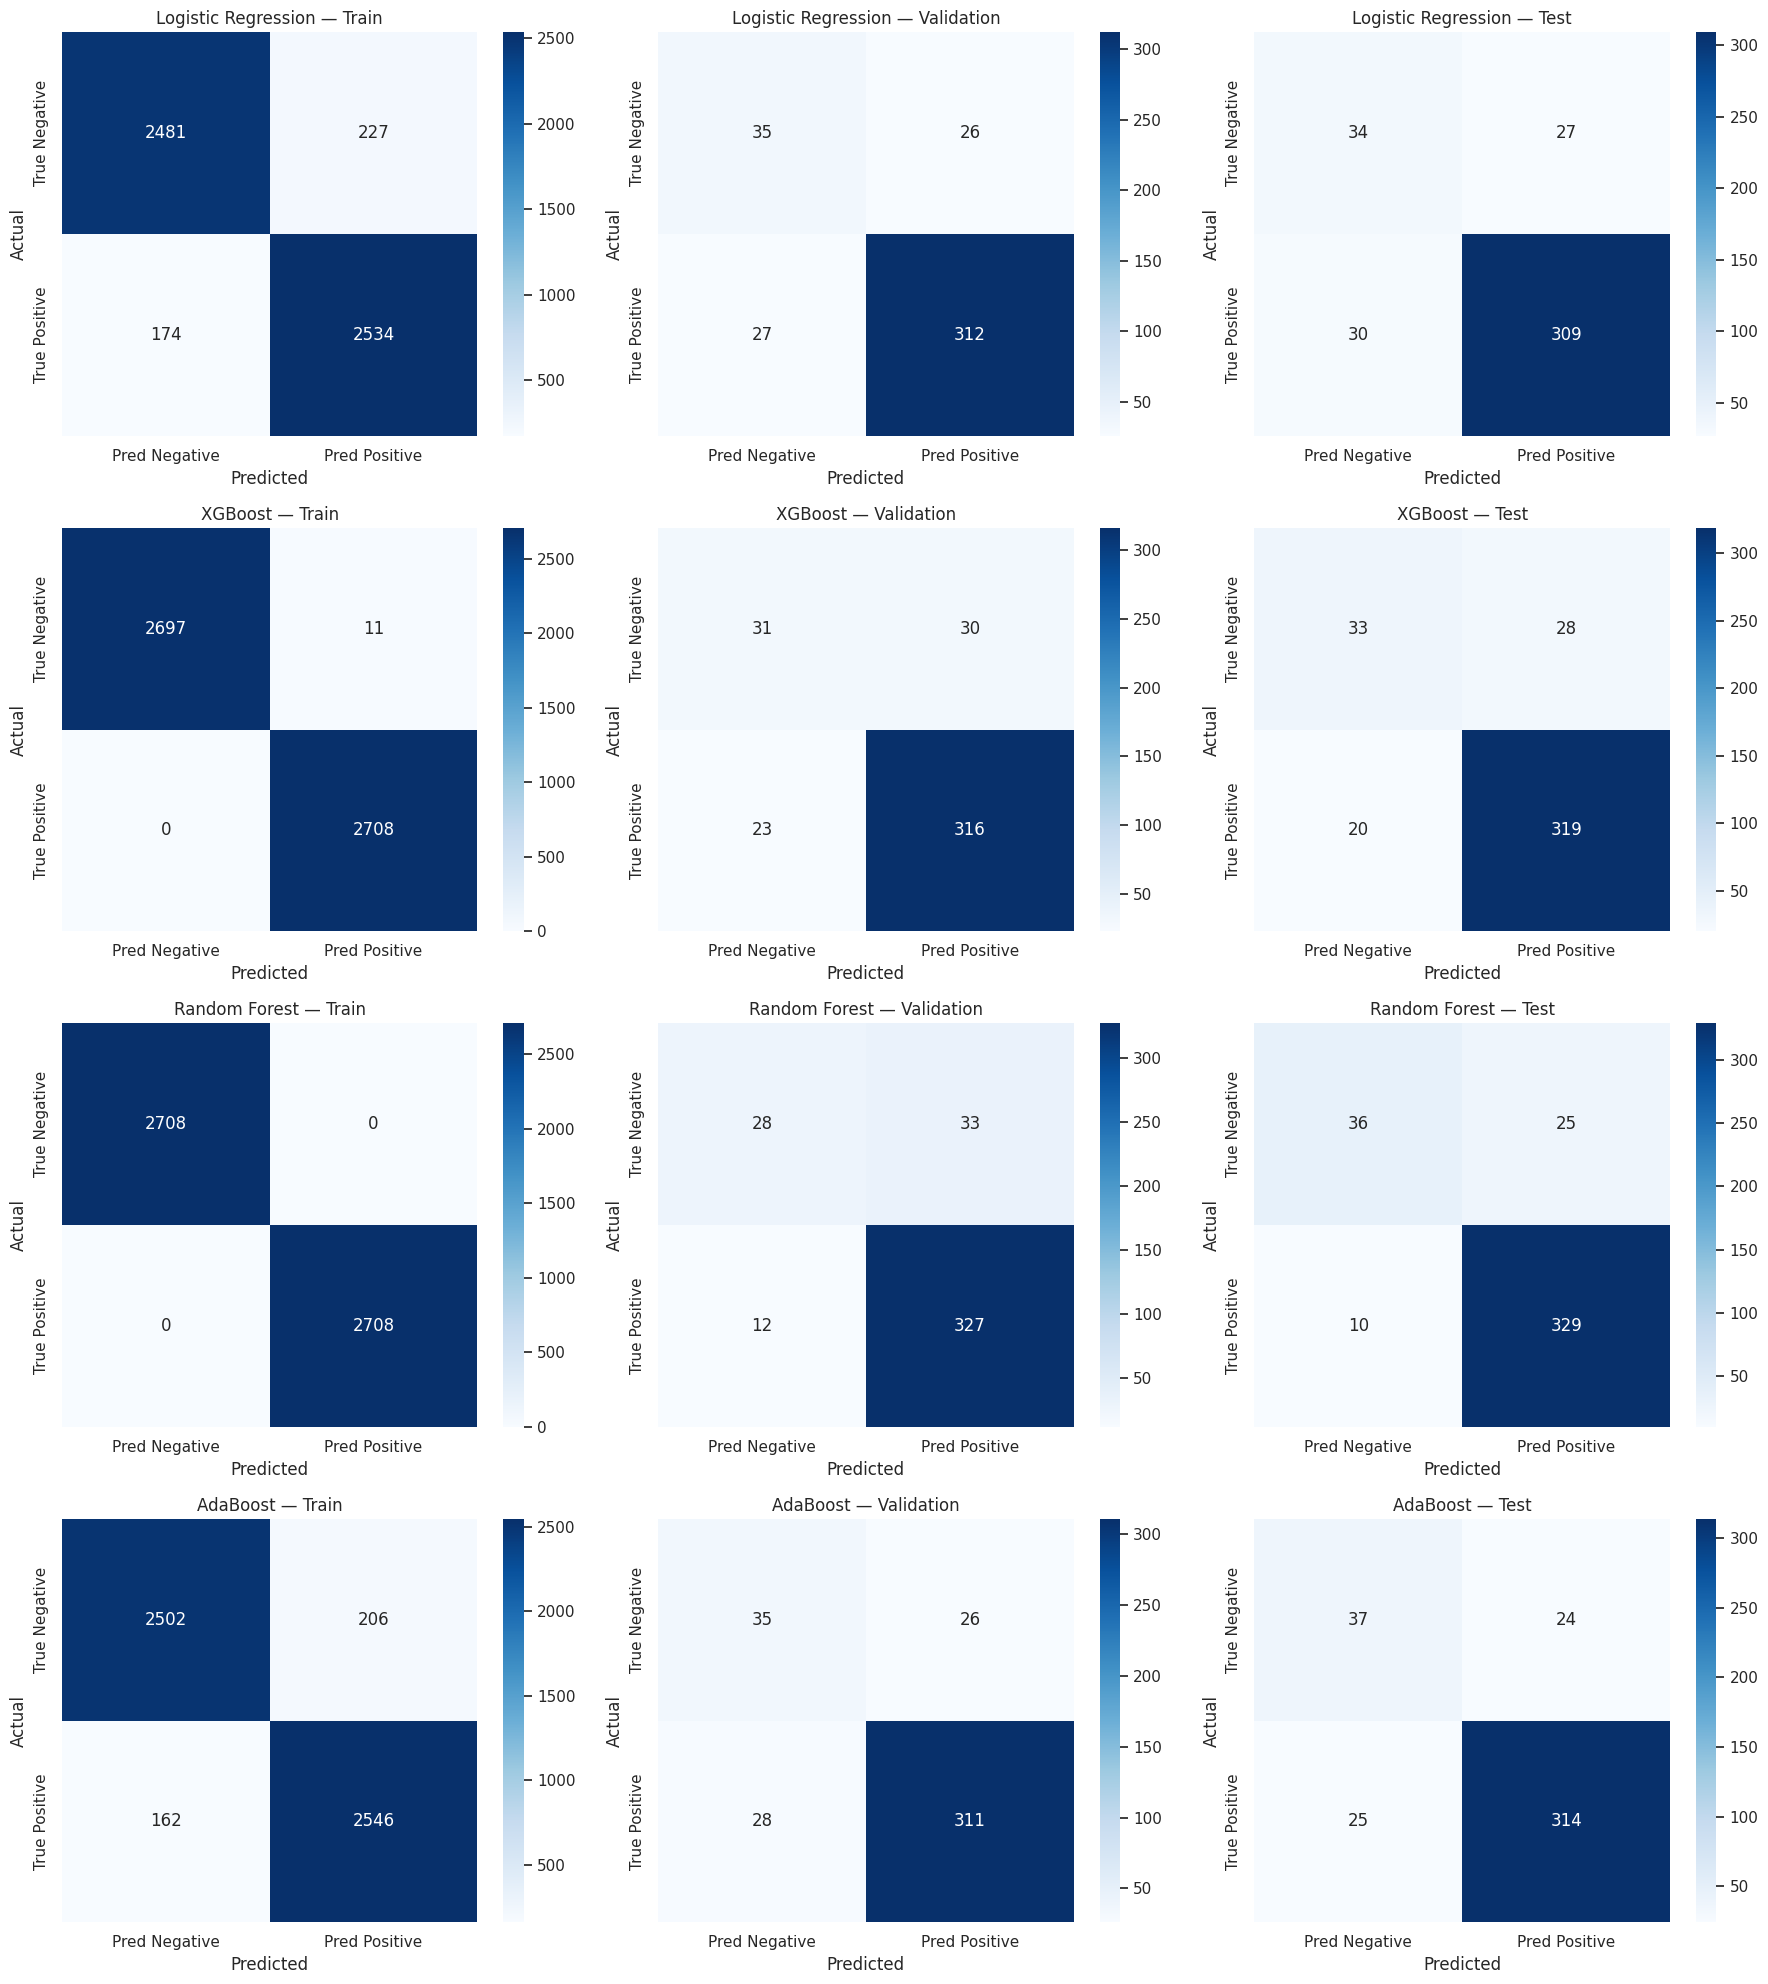

In [51]:

# Function to display labeled confusion matrix
def plot_confusion_matrix(model, X, y_true, model_name, dataset_name, ax):
    y_pred = model.predict(X)
    cm = confusion_matrix(y_true, y_pred)

    labels = ["Negative", "Positive"]
    cm_df = pd.DataFrame(cm, index=[f"True {label}" for label in labels],
                            columns=[f"Pred {label}" for label in labels])

    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{model_name} — {dataset_name}")
    ax.set_ylabel("Actual")
    ax.set_xlabel("Predicted")


# Plot confusion matrices for all combinations
fig, axes = plt.subplots(nrows=len(models), ncols=3, figsize=(18, 5 * len(models)))

for row_idx, (model, model_name) in enumerate(models):
    for col_idx, (dataset_name, X, y) in enumerate(datasets):
        plot_confusion_matrix(model, X, y, model_name, dataset_name, ax=axes[row_idx, col_idx])

plt.tight_layout()
plt.show()

# References

imbalanced-learn. (n.d.). imblearn.over_sampling.KMeansSMOTE. https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.KMeansSMOTE.html

imbalanced-learn. (n.d.). imblearn.combine.SMOTEENN. https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html

scikit-learn. (n.d.). sklearn.metrics.f1_score. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

scikit-learn. (n.d.). sklearn.model_selection.StratifiedKFold. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

scikit-learn developers. (2025). AdaBoostClassifier — scikit-learn 1.6.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html​

Ryan & Matt Data Science. (n.d.). Random Forest Algorithm Explained with Python and scikit-learn . YouTube. https://www.youtube.com/watch?v=_QuGM_FW9eo

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7886f7cb-e56c-42d3-a9ab-d1777da1825b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>